### Clustering using scikit-learn (with pandas and matplotlib)

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster

In [2]:
# Read Cities.csv into dataframe
cities = pd.read_csv('Cities.csv')

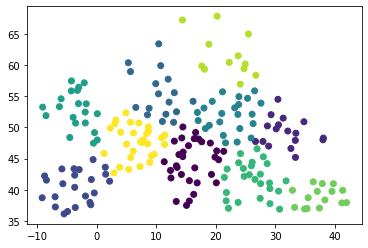

In [3]:
# K-means clustering based on longitude-latitude
kmeans = cluster.KMeans(10)
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
# Try different values for K

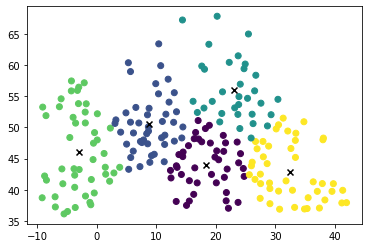

In [4]:
# Now with centroids
kmeans = cluster.KMeans(5)
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()

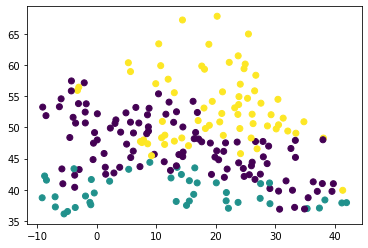

[[ 9.56722222]
 [15.14439024]
 [ 5.7634375 ]]


In [5]:
# K-means clustering based on temperature
kmeans = cluster.KMeans(3)
kmeans.fit(cities[['temperature']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
print (centroids)

### <font color="green">Your Turn: Clustering on World Cup Data</font>

In [6]:
# Read Players.csv into dataframe
players = pd.read_csv('Players.csv')

In [10]:
for i, column in enumerate(list([str(d) for d in players.dtypes])):
    if column == "object":
        players[players.columns[i]] = players[players.columns[i]].fillna(players[players.columns[i]].mode())
        players[players.columns[i]] = players[players.columns[i]].astype("category").cat.codes
    else:
        players[players.columns[i]] = players[players.columns[i]].fillna(players[players.columns[i]].median())

In [16]:
players.columns

Index(['surname', 'team', 'position', 'minutes', 'shots', 'passes', 'tackles',
       'saves'],
      dtype='object')

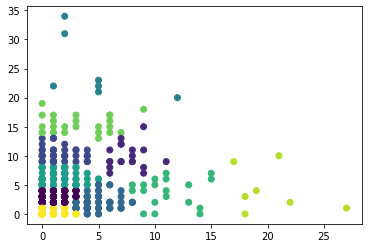

In [18]:
# K-means clustering based on longitude-latitude
kmeans = cluster.KMeans(10)
kmeans.fit(players[['shots','tackles']])
labels = kmeans.labels_
plt.scatter(players['shots'], players['tackles'], c=labels)
plt.show()
# Try different values for K

In [25]:
import numpy as np

In [26]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

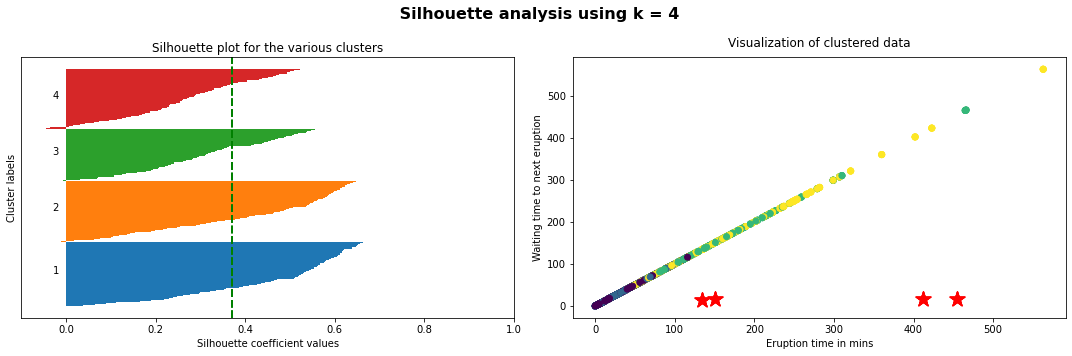

In [33]:

for i,k in enumerate([4]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # Run the kmeans algorithm
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(players)
    centroids  = km.cluster_centers_
# get silhouette
silhouette_vals = silhouette_samples(players,y_predict)
    #silhouette_vals
# silhouette plot
y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(y_predict)):
    cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    ax[0].barh(range(y_lower,y_upper),
    cluster_silhouette_vals,height =1);
    ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
    y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score 
    avg_score = np.mean(silhouette_vals)
    ax[0].axvline(avg_score,linestyle ='--',
    linewidth =2,color = 'green')
    ax[0].set_yticks([])
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_xlabel('Silhouette coefficient values')
    ax[0].set_ylabel('Cluster labels')
    ax[0].set_title('Silhouette plot for the various clusters');


    # scatter plot of data colored with labels

    ax[1].scatter(players['passes'],
    players['passes'] , c = y_predict);
    ax[1].scatter(centroids[:,0],centroids[:,1],
    marker = '*' , c= 'r',s =250);
    ax[1].set_xlabel('Eruption time in mins')
    ax[1].set_ylabel('Waiting time to next eruption')
    ax[1].set_title('Visualization of clustered data', y=1.02)

    plt.tight_layout()
    plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')
    plt.savefig(f'Silhouette_analysis_{k}.jpg')

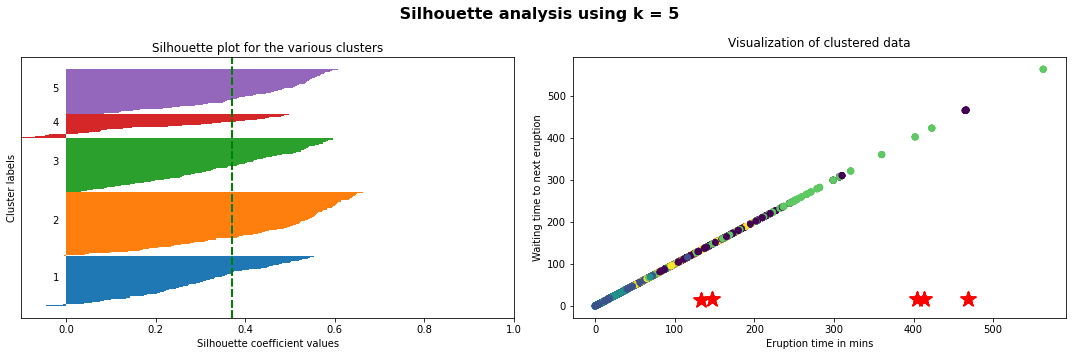

In [35]:

for i,k in enumerate([5]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # Run the kmeans algorithm
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(players)
    centroids  = km.cluster_centers_
# get silhouette
silhouette_vals = silhouette_samples(players,y_predict)
    #silhouette_vals
# silhouette plot
y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(y_predict)):
    cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    ax[0].barh(range(y_lower,y_upper),
    cluster_silhouette_vals,height =1);
    ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
    y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score 
    avg_score = np.mean(silhouette_vals)
    ax[0].axvline(avg_score,linestyle ='--',
    linewidth =2,color = 'green')
    ax[0].set_yticks([])
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_xlabel('Silhouette coefficient values')
    ax[0].set_ylabel('Cluster labels')
    ax[0].set_title('Silhouette plot for the various clusters');


    # scatter plot of data colored with labels

    ax[1].scatter(players['passes'],
    players['passes'] , c = y_predict);
    ax[1].scatter(centroids[:,0],centroids[:,1],
    marker = '*' , c= 'r',s =250);
    ax[1].set_xlabel('Eruption time in mins')
    ax[1].set_ylabel('Waiting time to next eruption')
    ax[1].set_title('Visualization of clustered data', y=1.02)

    plt.tight_layout()
    plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')
    plt.savefig(f'Silhouette_analysis_{k}.jpg')

In [ ]:
# Create a clustering from the Players data and show it
# visually in a scatterplot. No need for centroids.